In [1]:
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist
from keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [4]:
model = keras.Sequential([
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6691 - accuracy: 0.8363 - val_loss: 0.3602 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3538 - accuracy: 0.9024 - val_loss: 0.3095 - val_accuracy: 0.9140
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3181 - accuracy: 0.9117 - val_loss: 0.2948 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3020 - accuracy: 0.9166 - val_loss: 0.2839 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2924 - accuracy: 0.9183 - val_loss: 0.2792 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2855 - accuracy: 0.9205 - val_loss: 0.2744 - val_accuracy: 0.9256
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2805 - accuracy: 0.9215 - val_loss: 0.2718 - val_accuracy: 0.9256
Epoch

In [5]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3716 - accuracy: 0.8936 - val_loss: 0.1946 - val_accuracy: 0.9446
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1691 - accuracy: 0.9502 - val_loss: 0.1414 - val_accuracy: 0.9602
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1217 - accuracy: 0.9645 - val_loss: 0.1271 - val_accuracy: 0.9627
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0932 - accuracy: 0.9716 - val_loss: 0.1149 - val_accuracy: 0.9653
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0742 - accuracy: 0.9770 - val_loss: 0.0965 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0983 - val_accuracy: 0.9718
Epoch 

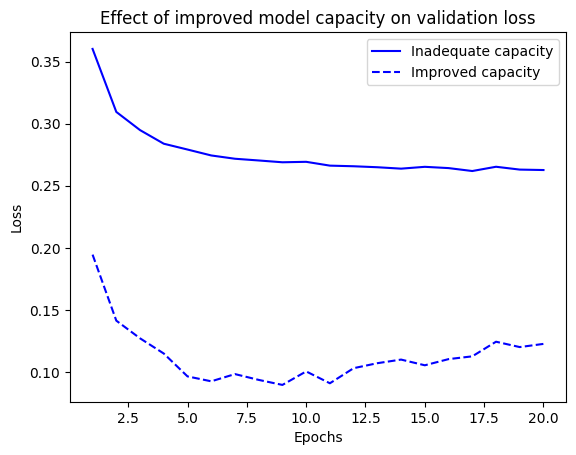

In [6]:
small_val_loss = history_small_model.history["val_loss"]
large_val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, small_val_loss, "b-", label="Inadequate capacity")
plt.plot(epochs, large_val_loss, "b--", label="Improved capacity")
plt.title("Effect of improved model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()